In [1]:
import glob
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster import hierarchy
import seaborn as sns
from sklearn import cluster, decomposition, preprocessing

%matplotlib inline

In [2]:
%ls ../data

sample/
tweet_activity_metrics_daveyscience_20220501_20220601_en.csv
tweet_activity_metrics_daveyscience_20220601_20220620_en.csv


In [3]:
df = pd.read_csv('../data/tweet_activity_metrics_daveyscience_20220501_20220601_en.csv',
                 parse_dates=['time'],
                 na_values='-'
                )

df

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,1531742335943458818,https://twitter.com/daveyscience/status/153174...,Day 20 | #100DaysOfCode\n\nLots of calculation...,2022-05-31 21:00:00+00:00,166.0,9.0,0.054217,3.0,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1531712141132189698,https://twitter.com/daveyscience/status/153171...,Performance metrics for classification models:...,2022-05-31 19:00:00+00:00,65.0,1.0,0.015385,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1531693380417343493,https://twitter.com/daveyscience/status/153169...,@sumitsaurabh927 Love your threads man! Where ...,2022-05-31 17:45:00+00:00,65.0,2.0,0.030769,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1531692879567106050,https://twitter.com/daveyscience/status/153169...,Reasons You Need to Learn Python\n\n1. Easy - ...,2022-05-31 17:43:00+00:00,1260.0,55.0,0.043651,0.0,4.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1531692724222574596,https://twitter.com/daveyscience/status/153169...,Popular Machine Learning Project Ideas\n\n- Im...,2022-05-31 17:42:00+00:00,926.0,13.0,0.014039,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,1520853569775177728,https://twitter.com/daveyscience/status/152085...,@marktenenholtz Do you put the XGB into produc...,2022-05-01 19:52:00+00:00,365.0,1.0,0.002740,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,1520836653463396352,https://twitter.com/daveyscience/status/152083...,@svpino inspiring! starting the same,2022-05-01 18:44:00+00:00,22.0,2.0,0.090909,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,1520835859666268161,https://twitter.com/daveyscience/status/152083...,@svpino do you think your skill and expertise ...,2022-05-01 18:41:00+00:00,253.0,1.0,0.003953,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,1520830325026287616,https://twitter.com/daveyscience/status/152083...,@DaygameCharisma it also might be a reflection...,2022-05-01 18:19:00+00:00,328.0,4.0,0.012195,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dtypes

Tweet id                                      int64
Tweet permalink                              object
Tweet text                                   object
time                            datetime64[ns, UTC]
impressions                                 float64
engagements                                 float64
engagement rate                             float64
retweets                                    float64
replies                                     float64
likes                                       float64
user profile clicks                         float64
url clicks                                  float64
hashtag clicks                              float64
detail expands                              float64
permalink clicks                            float64
app opens                                     int64
app installs                                  int64
follows                                       int64
email tweet                                   int64
dial phone  

## Loading Data

In [5]:
data = [pd.read_csv(f, parse_dates=['time'], na_values='-') for f in glob.glob('../data/tweet_activity_metrics*.csv')]

In [6]:
df = pd.concat(data, axis=0, ignore_index=True)

In [7]:
df.head()

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,1531742335943458818,https://twitter.com/daveyscience/status/153174...,Day 20 | #100DaysOfCode\n\nLots of calculation...,2022-05-31 21:00:00+00:00,166.0,9.0,0.054217,3.0,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1531712141132189698,https://twitter.com/daveyscience/status/153171...,Performance metrics for classification models:...,2022-05-31 19:00:00+00:00,65.0,1.0,0.015385,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1531693380417343493,https://twitter.com/daveyscience/status/153169...,@sumitsaurabh927 Love your threads man! Where ...,2022-05-31 17:45:00+00:00,65.0,2.0,0.030769,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1531692879567106050,https://twitter.com/daveyscience/status/153169...,Reasons You Need to Learn Python\n\n1. Easy - ...,2022-05-31 17:43:00+00:00,1260.0,55.0,0.043651,0.0,4.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1531692724222574596,https://twitter.com/daveyscience/status/153169...,Popular Machine Learning Project Ideas\n\n- Im...,2022-05-31 17:42:00+00:00,926.0,13.0,0.014039,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleanup

In [8]:
def tweak_twit(df):
    drop_cols = ['Tweet id', 'Tweet permalink', 'permalink clicks', 'app installs', 'app opens', 'email tweet', 'dial phone']    
    return (df
            # Research how to drop columns programmatically based on all NaN or sum 0
            .drop(columns=[c for c in df.columns if 'promoted' in c])
            .drop(columns=drop_cols)
            .rename(columns=lambda col: col.replace(' ', "_"))
            # Accessing column by indexing requires reference to original df's column name syntax
            .assign(is_reply=df['Tweet text'].str.startswith('@'),
                    # Accessing column through lambda function implies access to the intermediate df
                    length=lambda df_: df_.Tweet_text.str.len(),
                    num_words=lambda df_: df_.Tweet_text.str.split().apply(len),
                    is_unicode=lambda df_: df_.Tweet_text.str.encode('ascii', errors='replace').str.decode('ascii') != df_.Tweet_text,
                    hour=lambda df_: df_.time.dt.hour,
                    dom=lambda df_: df_.time.dt.day,
                    dow=lambda df_: df_.time.dt.dayofweek,
                    at_tweet=lambda df_: df_.Tweet_text.str.contains('@'),
                    has_newlines= lambda df_: df_.Tweet_text.str.contains('\n'),
                    num_lines= lambda df_: df_.Tweet_text.str.count('\n')+1,
                    num_mentions=lambda df_: df_.Tweet_text.str.count('@'),
                    has_hashtag=lambda df_: df_.Tweet_text.str.contains('#'),
                   )
            
           )

tweak_twit(df)#.length.hist()

,Tweet_text,time,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,...,num_words,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag
0,Day 20 | #100DaysOfCode\n\nLots of calculation...,2022-05-31 21:00:00+00:00,166.0,9.0,0.054217,3.0,0.0,6.0,0.0,0.0,...,21,False,21,31,1,False,True,5,0,True
1,Performance metrics for classification models:...,2022-05-31 19:00:00+00:00,65.0,1.0,0.015385,0.0,0.0,1.0,0.0,0.0,...,40,False,19,31,1,False,True,13,0,False
2,@sumitsaurabh927 Love your threads man! Where ...,2022-05-31 17:45:00+00:00,65.0,2.0,0.030769,0.0,1.0,1.0,0.0,0.0,...,11,False,17,31,1,True,False,1,1,False
3,Reasons You Need to Learn Python\n\n1. Easy - ...,2022-05-31 17:43:00+00:00,1260.0,55.0,0.043651,0.0,4.0,18.0,10.0,0.0,...,44,False,17,31,1,False,True,9,0,False
4,Popular Machine Learning Project Ideas\n\n- Im...,2022-05-31 17:42:00+00:00,926.0,13.0,0.014039,0.0,0.0,2.0,3.0,0.0,...,38,False,17,31,1,False,True,8,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Essential Skills in Data Science\n\n- Translat...,2022-06-01 13:12:00+00:00,630.0,19.0,0.030159,0.0,0.0,4.0,7.0,0.0,...,41,False,13,1,2,False,True,8,0,False
384,"@WellPaidGeek agreed, but it has a double mean...",2022-06-01 13:04:00+00:00,23.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,18,True,13,1,2,True,False,1,1,False
385,@KennKibadi thanks! right back at you,2022-06-01 05:21:00+00:00,37.0,1.0,0.027027,0.0,0.0,1.0,0.0,0.0,...,6,False,5,1,2,True,False,1,1,False
386,@v_vashishta love this! i learned working whil...,2022-06-01 04:27:00+00:00,28.0,3.0,0.107143,0.0,0.0,1.0,0.0,0.0,...,28,False,4,1,2,True,False,1,1,False


In [9]:
df.shape

(388, 40)

In [10]:
df.isna().sum()

Tweet id                          0
Tweet permalink                   0
Tweet text                        0
time                              0
impressions                       0
engagements                       0
engagement rate                   0
retweets                          0
replies                           0
likes                             0
user profile clicks               0
url clicks                        0
hashtag clicks                    0
detail expands                    0
permalink clicks                  0
app opens                         0
app installs                      0
follows                           0
email tweet                       0
dial phone                        0
media views                       0
media engagements                 0
promoted impressions            388
promoted engagements            388
promoted engagement rate        388
promoted retweets               388
promoted replies                388
promoted likes              

## Correlations

In [11]:
(tweak_twit(df)
 .corr()
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,follows,media_views,media_engagements,is_reply,length,num_words,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag
impressions,1.000000,0.593009,-0.120096,0.192434,0.274471,0.655571,0.296354,0.036750,0.137248,0.608494,0.115960,-0.008248,-0.008248,-0.095437,0.158283,0.138325,0.009347,-0.058647,-0.068906,-0.050852,-0.077858,0.183650,0.141694,-0.050948,0.066081
engagements,0.593009,1.000000,0.170914,0.375352,0.570212,0.633797,0.811821,0.093961,0.158950,0.741161,0.155079,0.068046,0.068046,-0.211269,0.128671,0.103402,-0.006952,-0.017734,-0.053096,-0.009647,-0.124860,0.211210,0.201512,0.081526,0.155125
engagement_rate,-0.120096,0.170914,1.000000,0.166239,0.168926,0.101190,0.114762,0.083156,0.019769,0.109886,-0.017874,0.104881,0.104881,0.014823,-0.006037,-0.006222,0.079518,0.002282,-0.006854,0.011682,0.036808,0.005742,-0.028723,0.091330,0.154923
retweets,0.192434,0.375352,0.166239,1.000000,0.113245,0.500474,0.125956,-0.014799,0.090203,0.193883,-0.031878,0.173702,0.173702,-0.346269,0.092624,0.067603,-0.060620,-0.044837,0.024833,-0.018776,-0.285197,0.327541,0.167586,-0.199640,0.616367
replies,0.274471,0.570212,0.168926,0.113245,1.000000,0.256559,0.390818,0.181594,0.219297,0.520363,0.207295,0.061653,0.061653,-0.100392,0.061616,0.053028,0.082248,-0.008964,-0.074661,0.009751,-0.049767,0.125380,0.051676,0.077350,0.039244
likes,0.655571,0.633797,0.101190,0.500474,0.256559,1.000000,0.189058,0.008246,0.045323,0.614430,0.085596,0.053616,0.053616,-0.204621,0.181772,0.171913,-0.018483,0.012620,-0.001860,-0.031502,-0.168173,0.261617,0.235612,-0.116488,0.264291
user_profile_clicks,0.296354,0.811821,0.114762,0.125956,0.390818,0.189058,1.000000,-0.005012,0.153158,0.305720,-0.002028,-0.008435,-0.008435,-0.073377,0.053427,0.027549,-0.015239,-0.011720,-0.038560,-0.023245,0.023187,0.064470,0.104273,0.259813,0.013719
url_clicks,0.036750,0.093961,0.083156,-0.014799,0.181594,0.008246,-0.005012,1.000000,-0.009385,-0.013121,-0.006485,0.002703,0.002703,0.049850,-0.031830,-0.044285,0.099614,0.021284,-0.042374,0.049448,0.047688,0.052795,-0.002463,0.021122,-0.026319
hashtag_clicks,0.137248,0.158950,0.019769,0.090203,0.219297,0.045323,0.153158,-0.009385,1.000000,0.041718,-0.011277,0.264818,0.264818,-0.079027,0.022333,0.011749,-0.019299,-0.034963,0.002277,0.021465,-0.054673,0.011563,-0.004091,-0.053827,0.304729
detail_expands,0.608494,0.741161,0.109886,0.193883,0.520363,0.614430,0.305720,-0.013121,0.041718,1.000000,0.345470,0.005935,0.005935,-0.215760,0.120036,0.115632,0.006165,-0.032048,-0.062157,0.026848,-0.190103,0.176654,0.175110,-0.097617,0.035340


<AxesSubplot:xlabel='impressions', ylabel='engagements'>

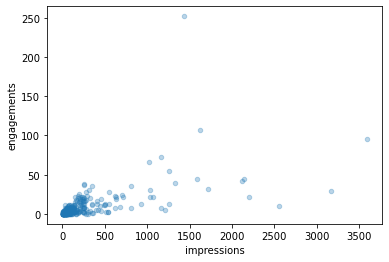

In [12]:
(tweak_twit(df)
 .plot.scatter(x='impressions', y='engagements', alpha=.3)
)

(0.0, 500.0)

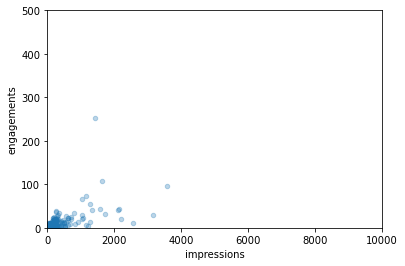

In [13]:
ax = (tweak_twit(df)
      .plot.scatter(x='impressions', y='engagements', alpha=.3)
     )
ax.set_xlim(0,10000)
ax.set_ylim(0,500)

In [14]:
(tweak_twit(df)
 .query('impressions > 8000')
 .corr(method='spearman')
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,follows,media_views,media_engagements,is_reply,length,num_words,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag
impressions,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
engagements,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
engagement_rate,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
retweets,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
replies,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
likes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
user_profile_clicks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
url_clicks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
hashtag_clicks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
detail_expands,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


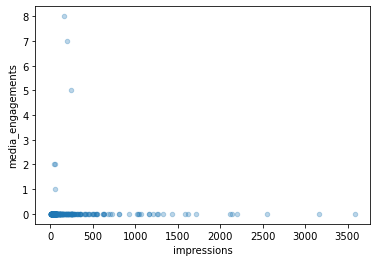

In [15]:
ax = (tweak_twit(df)
      .plot.scatter(x='impressions', y='media_engagements', alpha=.3)
     )
# ax.set_xlim(0,10000)
# ax.set_ylim(0,500)

## More Exploring

In [16]:
(tweak_twit(df)
 .query('likes > 50')
 .corr(method='spearman')
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,follows,media_views,media_engagements,is_reply,length,num_words,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag
impressions,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
engagements,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
engagement_rate,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
retweets,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
replies,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
likes,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
user_profile_clicks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
url_clicks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
hashtag_clicks,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
detail_expands,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<AxesSubplot:xlabel='impressions', ylabel='likes'>

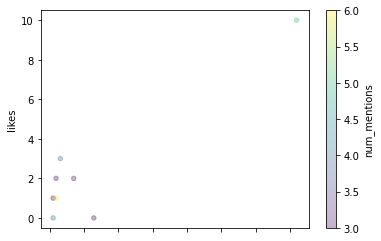

In [17]:
(tweak_twit(df)
 .query('num_mentions > 2')
 .plot.scatter(x='impressions', y='likes', c='num_mentions', cmap='viridis', alpha=.3)
)

<AxesSubplot:xlabel='impressions', ylabel='hour'>

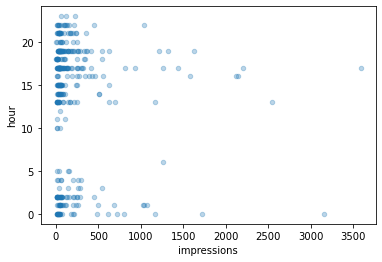

In [18]:
(tweak_twit(df)
#  .query('num_mentions > 2')
 .plot.scatter(x='impressions', y='hour', alpha=.3)
)

<AxesSubplot:xlabel='hour'>

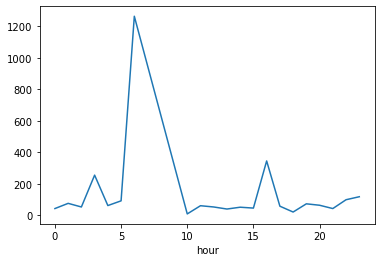

In [19]:
(tweak_twit(df)
 .groupby('hour')
 .impressions
 .median()
 .plot()
)

(0.0, 5000.0)

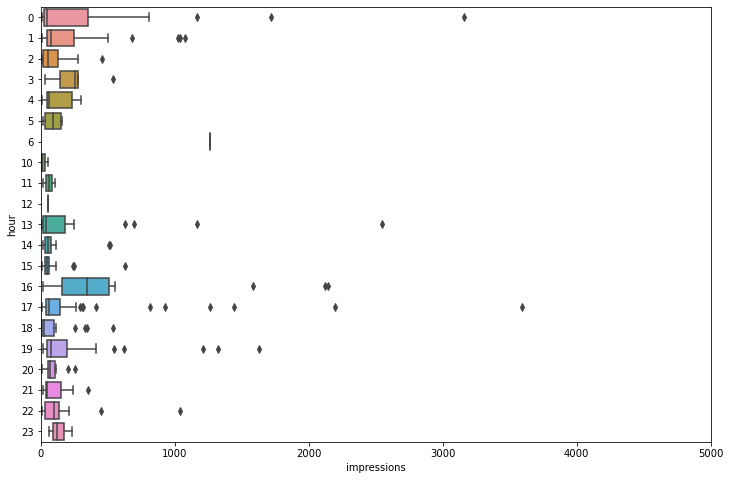

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x='impressions', y='hour', data=tweak_twit(df), orient='h')
ax.set_xlim(0,5000)

(0.0, 50.0)

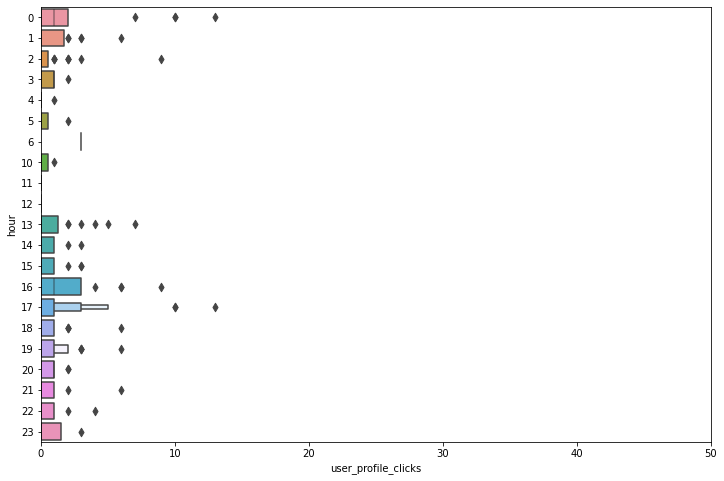

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxenplot(x='user_profile_clicks', y='hour', data=tweak_twit(df), orient='h')
ax.set_xlim(0,50)

<AxesSubplot:xlabel='impressions', ylabel='user_profile_clicks'>

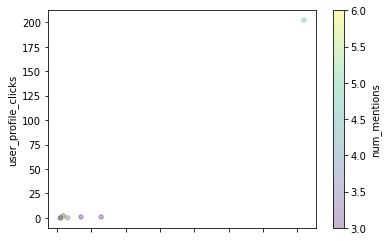

In [22]:
(tweak_twit(df)
 .query('num_mentions > 2')
 .plot.scatter(x='impressions', y='user_profile_clicks',
               c='num_mentions', cmap='viridis',
               alpha=.3)
)

In [23]:
(tweak_twit(df)
 # pd.cut makes bins of equal width (unless you manually override it as done here)
 .assign(profile_bin=lambda df_: pd.cut(df_.user_profile_clicks, bins=[1,10,50,100,500]))
 # pd.qcut attempts to make quantiles with the same number of observations in each bin
#  .assign(profile_bin=lambda df_: pd.qcut(df_.user_profile_clicks, q=2))
 .groupby('profile_bin')
 .mean()
 .T
 .style.background_gradient(cmap='RdBu', axis=1) 

)

profile_bin,"(1, 10]","(10, 50]","(50, 100]","(100, 500]"
impressions,484.273973,3375.000000,1021.000000,1438.000000
engagements,16.397260,62.000000,66.000000,252.000000
engagement_rate,0.085100,0.017822,0.064643,0.175243
retweets,0.972603,1.500000,0.000000,5.000000
replies,0.616438,0.500000,2.000000,5.000000
likes,4.643836,19.500000,0.000000,10.000000
user_profile_clicks,3.534247,13.000000,56.000000,202.000000
url_clicks,0.000000,1.500000,0.000000,0.000000
hashtag_clicks,0.068493,0.000000,2.000000,0.000000
detail_expands,6.424658,26.000000,6.000000,30.000000


## Time Series

<AxesSubplot:xlabel='time'>

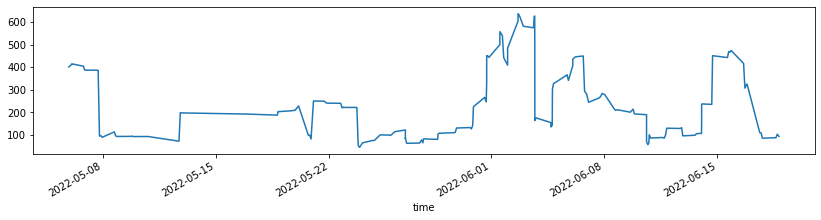

In [24]:
fig, ax = plt.subplots(figsize=(14,3))
(tweak_twit(df)
 .query('at_tweet != True')
 .set_index('time')
 .sort_index()
 .impressions
 # Take the rolling X day average
 .rolling(10)
 # Group by X and take average. 'd' == day
#  .resample('d')
 .mean()
 .plot(ax=ax)
)


## Merging

In [25]:
new_followers = [0, 19, 79]
followers = pd.Series(new_followers, index=pd.date_range('apr 2022', periods=3, freq='m', tz='UTC')).cumsum() + 21
followers

2022-04-30 00:00:00+00:00     21
2022-05-31 00:00:00+00:00     40
2022-06-30 00:00:00+00:00    119
Freq: M, dtype: int64

<AxesSubplot:>

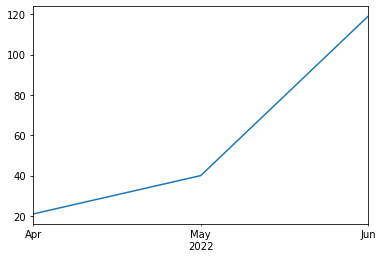

In [26]:
followers.plot()

In [27]:
complete_follows = (followers
                     .resample('d')
                     .interpolate()
                     .rename('followers')
                     .to_frame()
                     .merge((tweak_twit(df)
                             .time
                             .sort_values()
                             .drop_duplicates()
                             .to_frame()
                            ),
                            left_index=True, right_on='time', how='outer'
                           )
                     .set_index('time')
                     .sort_index()
                     .interpolate(method='time')
#                      .plot()
                    )

In [28]:
(tweak_twit(df)
 .merge(complete_follows, left_on='time', right_index=True, how='left')
)

,Tweet_text,time,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,...,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers
0,Day 20 | #100DaysOfCode\n\nLots of calculation...,2022-05-31 21:00:00+00:00,166.0,9.0,0.054217,3.0,0.0,6.0,0.0,0.0,...,False,21,31,1,False,True,5,0,True,42.304167
1,Performance metrics for classification models:...,2022-05-31 19:00:00+00:00,65.0,1.0,0.015385,0.0,0.0,1.0,0.0,0.0,...,False,19,31,1,False,True,13,0,False,42.084722
2,@sumitsaurabh927 Love your threads man! Where ...,2022-05-31 17:45:00+00:00,65.0,2.0,0.030769,0.0,1.0,1.0,0.0,0.0,...,False,17,31,1,True,False,1,1,False,41.947569
3,Reasons You Need to Learn Python\n\n1. Easy - ...,2022-05-31 17:43:00+00:00,1260.0,55.0,0.043651,0.0,4.0,18.0,10.0,0.0,...,False,17,31,1,False,True,9,0,False,41.943912
4,Popular Machine Learning Project Ideas\n\n- Im...,2022-05-31 17:42:00+00:00,926.0,13.0,0.014039,0.0,0.0,2.0,3.0,0.0,...,False,17,31,1,False,True,8,0,False,41.942083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Essential Skills in Data Science\n\n- Translat...,2022-06-01 13:12:00+00:00,630.0,19.0,0.030159,0.0,0.0,4.0,7.0,0.0,...,False,13,1,2,False,True,8,0,False,44.081667
384,"@WellPaidGeek agreed, but it has a double mean...",2022-06-01 13:04:00+00:00,23.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,True,13,1,2,True,False,1,1,False,44.067037
385,@KennKibadi thanks! right back at you,2022-06-01 05:21:00+00:00,37.0,1.0,0.027027,0.0,0.0,1.0,0.0,0.0,...,False,5,1,2,True,False,1,1,False,43.220347
386,@v_vashishta love this! i learned working whil...,2022-06-01 04:27:00+00:00,28.0,3.0,0.107143,0.0,0.0,1.0,0.0,0.0,...,False,4,1,2,True,False,1,1,False,43.121597


<AxesSubplot:xlabel='time'>

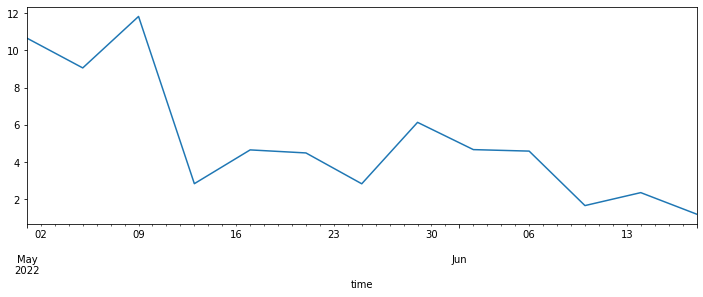

In [29]:
fig, ax = plt.subplots(figsize=(12,4))
(tweak_twit(df)
 .merge(complete_follows, left_on='time', right_index=True, how='left')
 .set_index('time')
 .sort_index()
 .assign(imp_ratio=lambda df_: df_.impressions / df_.followers)
 .imp_ratio
#  .rolling(20)
#  .resample('w')
 .resample('4d')
 .mean()
 .plot()
)

In [30]:
# UPDATE the tweak_twit function to include the merge operations we stepped iteratively in the cells above

def tweak_twit(df):
    drop_cols = ['Tweet id', 'Tweet permalink', 'permalink clicks', 'app installs', 'app opens', 'email tweet', 'dial phone']    
    df2 = (df
            # Research how to drop columns programmatically based on all NaN or sum 0
            .drop(columns=[c for c in df.columns if 'promoted' in c])
            .drop(columns=drop_cols)
            .rename(columns=lambda col: col.replace(' ', "_"))
            # Accessing column by indexing requires reference to original df's column name syntax
            .assign(is_reply=df['Tweet text'].str.startswith('@'),
                    # Accessing column through lambda function implies access to the intermediate df
                    length=lambda df_: df_.Tweet_text.str.len(),
                    num_words=lambda df_: df_.Tweet_text.str.split().apply(len),
                    is_unicode=lambda df_: df_.Tweet_text.str.encode('ascii', errors='replace').str.decode('ascii') != df_.Tweet_text,
                    hour=lambda df_: df_.time.dt.hour,
                    dom=lambda df_: df_.time.dt.day,
                    dow=lambda df_: df_.time.dt.dayofweek,
                    at_tweet=lambda df_: df_.Tweet_text.str.contains('@'),
                    has_newlines= lambda df_: df_.Tweet_text.str.contains('\n'),
                    num_lines= lambda df_: df_.Tweet_text.str.count('\n')+1,
                    num_mentions=lambda df_: df_.Tweet_text.str.count('@'),
                    has_hashtag=lambda df_: df_.Tweet_text.str.contains('#'),
                   )
            
           )
    
    new_followers = [0, 133, 132, 78, 201, 89, 178, 322, 212, 110, 100, 210, 140]
    followers = pd.Series(new_followers, index=pd.date_range('dec 2019', periods=13, freq='m', tz='UTC')).cumsum() + 4400
    complete_follows = (followers
                         .resample('d')
                         .interpolate()
                         .rename('followers')
                         .to_frame()
                         .merge(df2
                                 .time
                                 .sort_values()
                                 .drop_duplicates()
                                 .to_frame(), left_index=True, right_on='time', how='outer'
                               )
                         .set_index('time')
                         .sort_index()
                         .interpolate(method='time')
                        )
    return (df2
            .merge(complete_follows, left_on='time', right_index=True, how='left')
           )

tweak_twit(df)

,Tweet_text,time,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,...,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers
0,Day 20 | #100DaysOfCode\n\nLots of calculation...,2022-05-31 21:00:00+00:00,166.0,9.0,0.054217,3.0,0.0,6.0,0.0,0.0,...,False,21,31,1,False,True,5,0,True,6305.0
1,Performance metrics for classification models:...,2022-05-31 19:00:00+00:00,65.0,1.0,0.015385,0.0,0.0,1.0,0.0,0.0,...,False,19,31,1,False,True,13,0,False,6305.0
2,@sumitsaurabh927 Love your threads man! Where ...,2022-05-31 17:45:00+00:00,65.0,2.0,0.030769,0.0,1.0,1.0,0.0,0.0,...,False,17,31,1,True,False,1,1,False,6305.0
3,Reasons You Need to Learn Python\n\n1. Easy - ...,2022-05-31 17:43:00+00:00,1260.0,55.0,0.043651,0.0,4.0,18.0,10.0,0.0,...,False,17,31,1,False,True,9,0,False,6305.0
4,Popular Machine Learning Project Ideas\n\n- Im...,2022-05-31 17:42:00+00:00,926.0,13.0,0.014039,0.0,0.0,2.0,3.0,0.0,...,False,17,31,1,False,True,8,0,False,6305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,Essential Skills in Data Science\n\n- Translat...,2022-06-01 13:12:00+00:00,630.0,19.0,0.030159,0.0,0.0,4.0,7.0,0.0,...,False,13,1,2,False,True,8,0,False,6305.0
384,"@WellPaidGeek agreed, but it has a double mean...",2022-06-01 13:04:00+00:00,23.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,True,13,1,2,True,False,1,1,False,6305.0
385,@KennKibadi thanks! right back at you,2022-06-01 05:21:00+00:00,37.0,1.0,0.027027,0.0,0.0,1.0,0.0,0.0,...,False,5,1,2,True,False,1,1,False,6305.0
386,@v_vashishta love this! i learned working whil...,2022-06-01 04:27:00+00:00,28.0,3.0,0.107143,0.0,0.0,1.0,0.0,0.0,...,False,4,1,2,True,False,1,1,False,6305.0


## Machine Learning - Clustering

In [31]:
cleaned = (tweak_twit(df)
           .drop(columns=['Tweet_text', 'time'])
          )

X_std = pd.DataFrame(preprocessing.StandardScaler().fit_transform(cleaned),
                     columns=cleaned.columns
                    )
X_std.head()

,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,...,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers
0,-0.079925,0.102196,0.036887,1.333844,-0.494578,1.057513,-0.147233,-0.073462,-0.127753,-0.390863,...,-0.448596,1.039728,2.145051,-1.067827,-1.097518,0.979590,0.523257,-0.861986,2.385300,0.0
1,-0.326567,-0.364986,-0.585732,-0.361128,-0.494578,-0.260133,-0.147233,-0.073462,-0.127753,-0.390863,...,-0.448596,0.764829,2.145051,-1.067827,-1.097518,0.979590,3.022011,-0.861986,-0.419235,0.0
2,-0.326567,-0.306589,-0.339062,-0.361128,0.926877,-0.260133,-0.147233,-0.073462,-0.127753,-0.390863,...,-0.448596,0.489930,2.145051,-1.067827,0.911147,-1.020836,-0.726120,0.459953,-0.419235,0.0
3,2.591623,2.788497,-0.132525,-0.361128,5.191242,4.219866,0.784682,-0.073462,-0.127753,3.231214,...,-0.448596,0.489930,2.145051,-1.067827,-1.097518,0.979590,1.772634,-0.861986,-0.419235,0.0
4,1.775995,0.335788,-0.607309,-0.361128,-0.494578,0.003396,0.132341,-0.073462,-0.127753,0.868990,...,-0.448596,0.489930,2.145051,-1.067827,-1.097518,0.979590,1.460290,-0.861986,-0.419235,0.0


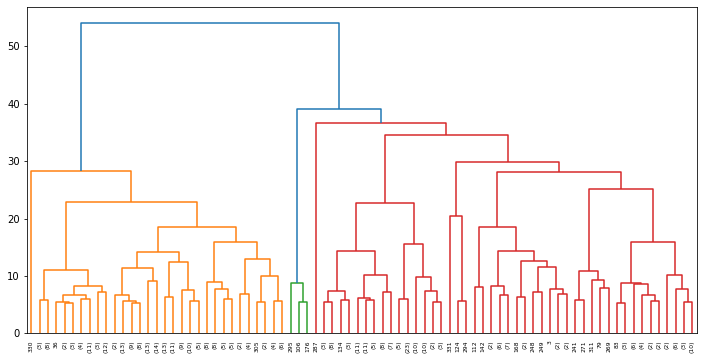

In [32]:
fig, ax = plt.subplots(figsize=(12,6))
_ = hierarchy.dendrogram(hierarchy.linkage(X_std, method='ward'), truncate_mode='lastp', p=80)

In [33]:
clus = cluster.AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
clus.fit(X_std)

AgglomerativeClustering(n_clusters=8)

In [34]:
(tweak_twit(df)
 .assign(label=clus.fit_predict(X_std))
 .groupby('label')
 .mean()
 .T
 .style.background_gradient('RdBu', axis=1)
)

label,0,1,2,3,4,5,6,7
impressions,260.022727,111.331658,736.666667,1146.481481,73.136364,201.666667,258.000000,1438.000000
engagements,15.409091,2.899497,37.333333,29.851852,2.600000,21.333333,38.000000,252.000000
engagement_rate,0.073963,0.052607,0.039288,0.037170,0.042303,0.107696,0.147287,0.175243
retweets,3.954545,0.055276,0.000000,1.296296,0.090909,4.333333,0.000000,5.000000
replies,0.431818,0.271357,2.000000,0.740741,0.227273,1.000000,3.000000,5.000000
likes,5.295455,0.869347,5.666667,9.555556,0.572727,4.666667,3.000000,10.000000
user_profile_clicks,2.022727,0.703518,1.333333,4.925926,0.390909,0.666667,0.000000,202.000000
url_clicks,0.022727,0.045226,0.000000,0.111111,0.018182,0.000000,31.000000,0.000000
hashtag_clicks,0.159091,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000
detail_expands,3.431818,0.949749,27.333333,13.222222,1.300000,3.333333,1.000000,30.000000


In [35]:
# Look into the tweets from a specific cluster
(tweak_twit(df)
 .assign(label=clus.fit_predict(X_std))
 .query('label == 2')
)

,Tweet_text,time,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,...,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers,label
124,"@marktenenholtz I use the term ""creative probl...",2022-05-12 03:58:00+00:00,541.0,3.0,0.005545,0.0,0.0,0.0,1.0,0.0,...,3,12,3,True,False,1,1,False,6305.0,2
294,The strength of your systems will determine yo...,2022-06-09 00:07:00+00:00,43.0,2.0,0.046512,0.0,0.0,0.0,0.0,0.0,...,0,9,3,False,True,3,0,True,6305.0,2
331,You will learn more Python in 3 months of proj...,2022-06-04 19:18:00+00:00,1626.0,107.0,0.065806,0.0,6.0,17.0,3.0,0.0,...,19,4,5,False,False,1,0,False,6305.0,2


<AxesSubplot:xlabel='engagements', ylabel='impressions'>

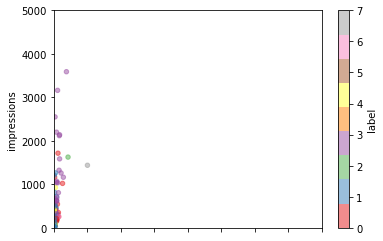

In [36]:
(tweak_twit(df)
 .assign(label=clus.fit_predict(X_std))
 .plot.scatter(x='engagements', y='impressions',
               c='label', cmap='Set1', alpha=.5,
               xlim=(0,2000), ylim=(0,5000)
              )
)

## Machine Learning - PCA

In [37]:
cleaned = (tweak_twit(df)
           .drop(columns=['Tweet_text', 'time'])
          )

X_std = pd.DataFrame(preprocessing.StandardScaler().fit_transform(cleaned),
                     columns=cleaned.columns
                    )
X_std.head()

,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,...,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers
0,-0.079925,0.102196,0.036887,1.333844,-0.494578,1.057513,-0.147233,-0.073462,-0.127753,-0.390863,...,-0.448596,1.039728,2.145051,-1.067827,-1.097518,0.979590,0.523257,-0.861986,2.385300,0.0
1,-0.326567,-0.364986,-0.585732,-0.361128,-0.494578,-0.260133,-0.147233,-0.073462,-0.127753,-0.390863,...,-0.448596,0.764829,2.145051,-1.067827,-1.097518,0.979590,3.022011,-0.861986,-0.419235,0.0
2,-0.326567,-0.306589,-0.339062,-0.361128,0.926877,-0.260133,-0.147233,-0.073462,-0.127753,-0.390863,...,-0.448596,0.489930,2.145051,-1.067827,0.911147,-1.020836,-0.726120,0.459953,-0.419235,0.0
3,2.591623,2.788497,-0.132525,-0.361128,5.191242,4.219866,0.784682,-0.073462,-0.127753,3.231214,...,-0.448596,0.489930,2.145051,-1.067827,-1.097518,0.979590,1.772634,-0.861986,-0.419235,0.0
4,1.775995,0.335788,-0.607309,-0.361128,-0.494578,0.003396,0.132341,-0.073462,-0.127753,0.868990,...,-0.448596,0.489930,2.145051,-1.067827,-1.097518,0.979590,1.460290,-0.861986,-0.419235,0.0


In [38]:
pca = decomposition.PCA()
X_pca = pca.fit_transform(X_std)

In [39]:
pd.DataFrame(X_pca, columns=[f'PC{n+1}' for n in range(X_pca.shape[1])])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
0,2.316112,-1.610122,0.939305,-0.698023,-1.958974,-1.117947,0.120783,0.245724,0.756936,-0.874576,...,0.270649,0.229266,0.123220,0.404010,-0.041716,0.033454,-0.118084,9.339670e-16,-1.159528e-15,-9.940192e-17
1,2.054107,-2.871011,-1.839952,1.041755,0.125690,-0.011144,0.774438,0.465279,0.638285,-0.505655,...,-0.951069,0.022991,0.045764,0.085583,0.684469,-0.109074,0.024586,-5.540134e-16,5.767422e-16,-3.057281e-17
2,-2.019397,0.696410,0.422868,-0.156704,-0.197825,-0.113936,0.525771,0.492708,1.049389,-0.992212,...,-0.208852,-0.392958,-0.214272,0.208691,0.153217,-0.042289,0.008349,-2.442939e-16,2.474108e-16,-8.532687e-17
3,6.623537,3.652674,-2.455715,0.332758,0.782377,0.874215,-0.186234,-0.058142,1.484405,-1.052675,...,-0.071619,0.039463,0.379651,1.913816,0.182716,0.092115,-0.134094,-6.730384e-16,7.789802e-16,-1.970780e-18
4,2.737380,-1.135111,-1.954379,0.797994,-0.259124,0.826240,0.599401,-0.062928,1.311704,-0.620186,...,0.499202,-0.217098,0.209635,-0.727576,0.541351,0.342959,-0.218754,-3.507842e-16,3.773002e-16,-6.878328e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,2.771355,-0.513832,-1.710715,0.495284,0.161908,1.027897,0.562597,-0.720347,-0.875449,0.731669,...,0.114943,0.313032,0.119992,-0.054450,0.113348,0.232768,-0.173341,6.162064e-17,-9.080842e-17,-1.386826e-17
384,-2.385992,0.473080,0.176258,-0.323084,0.502437,0.170662,-0.261094,-0.915430,0.727214,0.419767,...,-0.331387,0.332871,-0.370153,-0.051836,-0.006794,0.026640,-0.075852,8.289661e-18,3.130859e-17,2.591381e-17
385,-2.710276,0.918845,0.959719,-0.909671,-0.626985,0.693056,0.468921,-0.500070,-0.839734,0.759863,...,-0.397748,0.080060,-0.190397,0.137220,-0.129907,-0.028537,0.050252,3.189348e-17,1.891168e-17,2.691455e-17
386,-1.871751,0.881423,-0.067316,0.726765,-0.635971,0.112816,-0.435444,0.029308,-1.214260,0.513073,...,-0.077980,0.248160,-0.112694,0.081783,0.018181,0.015566,0.035888,2.375494e-18,8.525570e-18,1.033487e-17


In [40]:
pca.explained_variance_ratio_

array([2.01279356e-01, 1.29822440e-01, 9.64722911e-02, 7.69744195e-02,
       5.67439523e-02, 5.21105184e-02, 4.51658125e-02, 4.17355998e-02,
       4.04003055e-02, 3.95591326e-02, 3.81820021e-02, 3.52854785e-02,
       3.04183279e-02, 2.75050575e-02, 2.10940954e-02, 1.69146294e-02,
       1.40795978e-02, 1.00563962e-02, 8.46727856e-03, 8.36563832e-03,
       7.56484268e-03, 9.29124626e-04, 8.73703407e-04, 1.18038251e-33,
       8.06641592e-34, 8.06641592e-34])

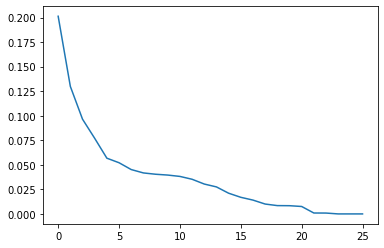

In [41]:
plt.plot(pca.explained_variance_ratio_)

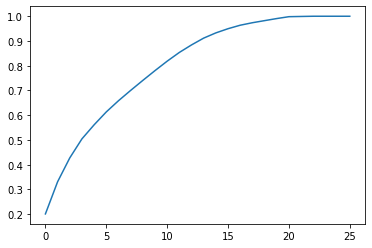

In [42]:
plt.plot(pca.explained_variance_ratio_.cumsum())

In [43]:
pd.DataFrame(pca.components_,
             columns=X_std.columns,
             index=[f'PC{n+1}' for n in range(X_pca.shape[1])]
            )

,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,hashtag_clicks,detail_expands,...,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers
PC1,2.202327e-01,0.281262,4.092005e-02,0.243182,0.166694,0.278576,0.139460,0.005199,0.086981,0.256277,...,-1.843576e-02,8.804070e-02,2.860470e-02,-5.435227e-03,-3.138999e-01,3.358856e-01,2.960224e-01,-2.361432e-01,1.920922e-01,0.0
PC2,2.847274e-01,0.393893,1.011572e-01,0.041771,0.299161,0.234983,0.322972,0.060999,0.072087,0.314706,...,2.089621e-02,-1.609694e-01,-1.020466e-01,-1.774037e-02,2.795101e-01,-2.037522e-01,-1.934870e-01,3.197454e-01,-4.994703e-02,0.0
PC3,-9.738094e-02,-0.016730,1.321534e-01,0.207728,0.011907,-0.018325,-0.041037,0.009478,0.248891,-0.078932,...,-1.594235e-02,-2.327020e-02,-6.065141e-02,2.079890e-02,-6.141454e-02,-9.117650e-02,-2.126262e-01,-7.101789e-02,3.323271e-01,0.0
PC4,-4.640440e-02,-0.035232,6.742104e-02,-0.038285,-0.021379,-0.045654,0.025145,-0.028421,0.138304,-0.128043,...,-1.044111e-01,-2.185862e-02,9.179809e-02,-1.854218e-01,2.528225e-01,4.118226e-02,8.296788e-02,2.491836e-01,-5.048651e-02,-0.0
PC5,-1.157339e-01,0.063264,6.851282e-02,-0.413328,0.311002,-0.257250,0.145986,0.293275,0.048007,0.064111,...,2.789878e-01,3.536684e-01,-1.200458e-01,2.759101e-01,-9.942124e-02,2.603582e-02,8.326470e-02,-2.017004e-02,-3.708487e-01,0.0
PC6,2.614761e-01,-0.092871,-4.919472e-01,-0.256799,-0.059065,0.056512,-0.241402,-0.247121,0.007997,0.240166,...,-2.302165e-01,-8.187166e-02,-1.694996e-01,-5.576875e-02,-4.798304e-02,-9.115580e-02,-4.635075e-02,-1.632156e-01,-2.028069e-01,0.0
PC7,1.750522e-02,0.172483,-3.161313e-01,-0.120369,-0.060741,-0.162288,0.496967,-0.365240,0.228503,-0.143310,...,-3.104632e-01,1.699284e-01,-2.283503e-02,-1.108928e-01,-6.719655e-02,-4.693050e-03,1.075807e-01,7.247886e-02,-9.423048e-02,-0.0
PC8,-3.076691e-01,-0.008313,1.564298e-01,-0.085446,0.256669,-0.327580,0.129703,-0.242110,0.366180,0.007316,...,-1.376025e-01,-2.193784e-01,2.706205e-01,4.214776e-02,-6.992431e-02,-3.897927e-02,-5.027560e-02,-8.050257e-03,1.806930e-01,-0.0
PC9,2.493836e-01,-0.034915,-3.253732e-01,-0.071737,-0.012468,0.087510,-0.071979,-0.009726,0.373806,-0.008310,...,5.463748e-01,-3.264811e-02,5.603208e-01,3.807547e-02,4.554643e-03,-1.145952e-01,-1.061957e-01,-7.074748e-02,2.455322e-02,-0.0
PC10,8.365169e-02,-0.065141,-2.926384e-01,-0.008863,0.133453,-0.132252,-0.042103,0.538357,0.413030,-0.174263,...,-7.946287e-02,-3.397802e-01,-4.089263e-01,-6.935904e-02,1.581757e-02,1.331383e-01,6.185768e-02,-5.778262e-02,1.344477e-01,0.0


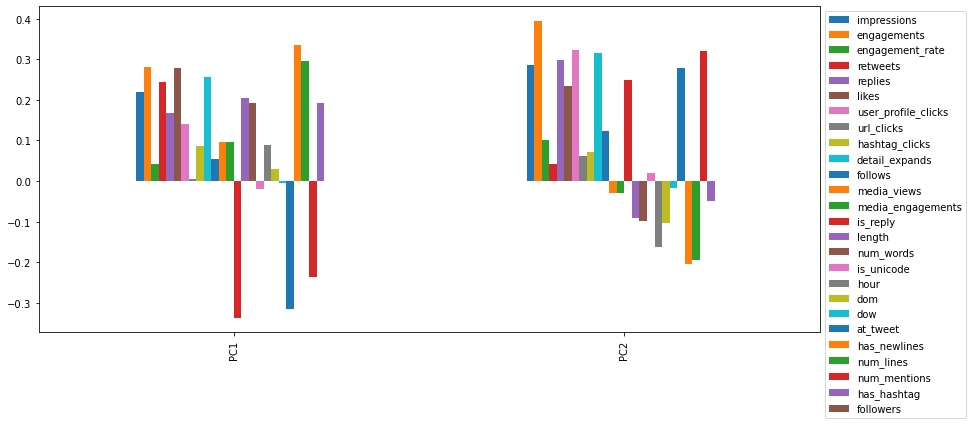

In [44]:
fig, ax = plt.subplots(figsize=(14,6))
(pd.DataFrame(pca.components_,
              columns=X_std.columns,
              index=[f'PC{n+1}' for n in range(X_pca.shape[1])]
            )
 .iloc[:2]
 .plot.bar(ax=ax)
 .legend(bbox_to_anchor=(1,1))
)

In [46]:
(pd.DataFrame(X_pca, columns=[f'PC{n+1}' for n in range(X_pca.shape[1])]
 .loc[lambda df_: df_.index != 675]
 .plot.scatter(x='PC1',
               y='PC2',
               alpha=.2,
               c=tweak_twit(df).loc[lambda df_: df_.index != 675].length,
               cmap='viridis'
              )
)
)

AttributeError: 'list' object has no attribute 'loc'

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

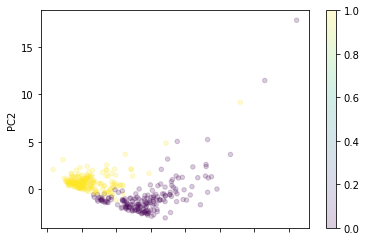

In [47]:
(pd.DataFrame(X_pca, columns=[f'PC{n+1}' for n in range(X_pca.shape[1])])
 .loc[lambda df_: df_.index != 675]
 .plot.scatter(x='PC1',
               y='PC2',
               alpha=.2,
               c=tweak_twit(df).loc[lambda df_: df_.index != 675].is_reply,
               cmap='viridis'
              )
)

In [48]:
(tweak_twit(df)
 .query('impressions > 50000')
)

,Tweet_text,time,impressions,engagements,engagement_rate,retweets,replies,likes,user_profile_clicks,url_clicks,...,is_unicode,hour,dom,dow,at_tweet,has_newlines,num_lines,num_mentions,has_hashtag,followers


In [49]:
clus = cluster.AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
clus.fit(X_std)

AgglomerativeClustering(n_clusters=8)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

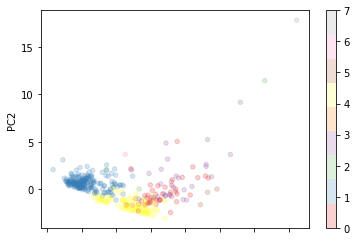

In [50]:
labels = pd.Series(clus.fit_predict(X_std))
(pd.DataFrame(X_pca, columns=[f'PC{n+1}' for n in range(X_pca.shape[1])])
 .loc[lambda df_: df_.index != 675]
 .plot.scatter(x='PC1',
               y='PC2',
               alpha=.2,
               c=labels.loc[lambda df_: df_.index != 675],
               cmap='Set1'
              )
)